In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv("anamoly.csv")

print(df.head())
print(df.columns)



             timestamp  cpu_usage_percent  memory_usage_percent
0  2024-11-25 12:00:00                 30                    40
1  2024-11-25 12:01:00                 32                    41
2  2024-11-25 12:02:00                 85                    70
3  2024-11-25 12:03:00                 33                    43
4  2024-11-25 12:04:00                 34                    45
Index(['timestamp', 'cpu_usage_percent', 'memory_usage_percent'], dtype='object')


In [74]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [75]:
# Optional: Resample or clean the data
df = df.set_index('timestamp').resample('1T').mean().reset_index()
print(df)

               timestamp  cpu_usage_percent  memory_usage_percent
0    2024-11-25 12:00:00               30.0                  40.0
1    2024-11-25 12:01:00               32.0                  41.0
2    2024-11-25 12:02:00               85.0                  70.0
3    2024-11-25 12:03:00               33.0                  43.0
4    2024-11-25 12:04:00               34.0                  45.0
...                  ...                ...                   ...
1441 2024-11-26 12:01:00               32.0                  41.0
1442 2024-11-26 12:02:00               85.0                  70.0
1443 2024-11-26 12:03:00               33.0                  43.0
1444 2024-11-26 12:04:00               34.0                  45.0
1445 2024-11-26 12:05:00               88.0                  72.0

[1446 rows x 3 columns]


/tmp/ipykernel_3960/4043252339.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.set_index('timestamp').resample('1T').mean().reset_index()


In [76]:
def calculate_z_scores(series):
    return (series - series.mean()) / series.std()


In [77]:
df['cpu_z_score'] = calculate_z_scores(df['cpu_usage_percent'])
df['memory_z_score'] = calculate_z_scores(df['memory_usage_percent'])


In [78]:
# Define anomalies as Z-scores greater than 2
df['cpu_anomaly'] = df['cpu_z_score'].abs() > 1
df['memory_anomaly'] = df['memory_z_score'].abs() > 1


In [79]:
# Filter anomalies
anomalies = df[df['cpu_anomaly'] | df['memory_anomaly']]
print("Detected anomalies:")
print(anomalies)


Detected anomalies:
               timestamp  cpu_usage_percent  memory_usage_percent  \
2    2024-11-25 12:02:00               85.0                  70.0   
5    2024-11-25 12:05:00               88.0                  72.0   
1442 2024-11-26 12:02:00               85.0                  70.0   
1445 2024-11-26 12:05:00               88.0                  72.0   

      cpu_z_score  memory_z_score  cpu_anomaly  memory_anomaly  
2        1.295664        1.273720         True            True  
5        1.407789        1.413946         True            True  
1442     1.295664        1.273720         True            True  
1445     1.407789        1.413946         True            True  


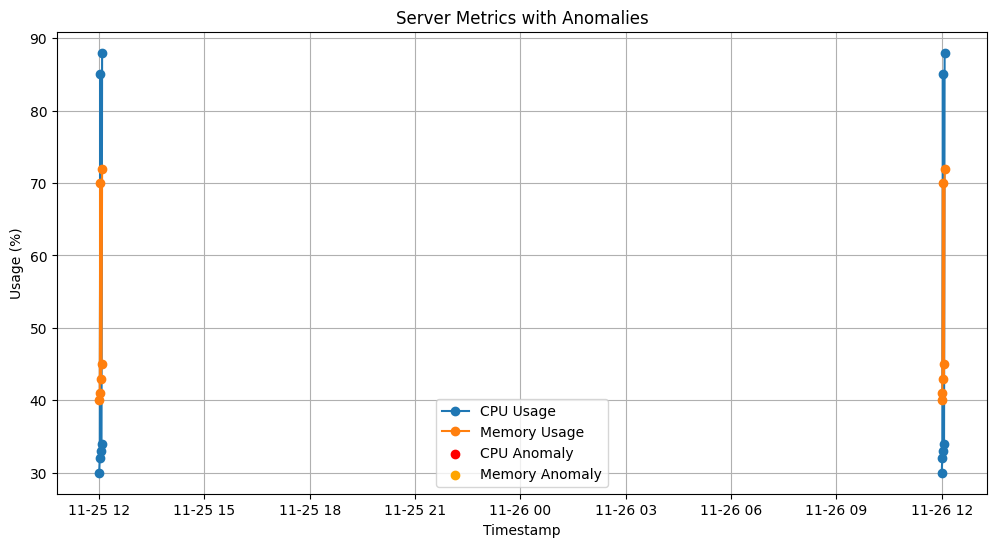

In [71]:
plt.figure(figsize=(12, 6))

# Plot CPU and memory usage
plt.plot(df['timestamp'], df['cpu_usage_percent'], label='CPU Usage', marker='o')
plt.plot(df['timestamp'], df['memory_usage_percent'], label='Memory Usage', marker='o')

# Highlight anomalies
plt.scatter(df['timestamp'][df['cpu_anomaly']], 
            df['cpu_usage_percent'][df['cpu_anomaly']], 
            color='red', label='CPU Anomaly')
plt.scatter(df['timestamp'][df['memory_anomaly']], 
            df['memory_usage_percent'][df['memory_anomaly']], 
            color='orange', label='Memory Anomaly')

plt.xlabel('Timestamp')
plt.ylabel('Usage (%)')
plt.title('Server Metrics with Anomalies')
plt.legend()
plt.grid()
plt.show()